## 1번 
#### 콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 
#### predict method를 이용하여 예측값을 구하라.
#### 데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns #데이터 시각화(추세 등) 패키지
from sklearn.preprocessing import scale, minmax_scale, robust_scale #Scaling클래스

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

matplotlib.rc('axes',unicode_minus=False)

In [3]:
df_raw = pd.read_csv("D:/data/2/Concrete.csv", encoding = 'EUC-KR')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["strength"] 
df_raw_x=df_raw.drop("strength", axis=1, inplace=False)

In [5]:
# train 0.6 test 0.4으로 분할
# 책에서도 validation 배제 했기 때문에 실습에서도 validation은 생각안함 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.4, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(618, 8)
(618,)
(412, 8)
(412,)


In [6]:
tree_uncustomized = DecisionTreeRegressor(random_state =1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Socor on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

# 모델 설명력은 train 99.6%
# test 79%로 
# 모델은 train데이터에 과대적합입니다.

Socor on training set: 0.996
Score on test set: 0.790


In [7]:
tree_uncustomized 

DecisionTreeRegressor(random_state=1234)

In [8]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [9]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.996,0.790
1,2,0.978,0.783
2,3,0.959,0.786
3,4,0.943,0.796
4,5,0.934,0.811
5,6,0.920,0.810
6,7,0.909,0.799
7,8,0.900,0.792
8,9,0.877,0.817
9,10,0.868,0.816


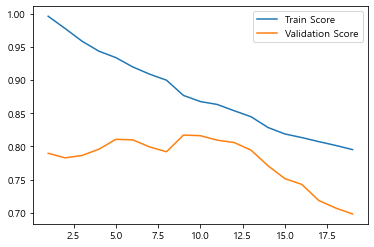

In [10]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "-", label = "Validation Score")
plt.legend()

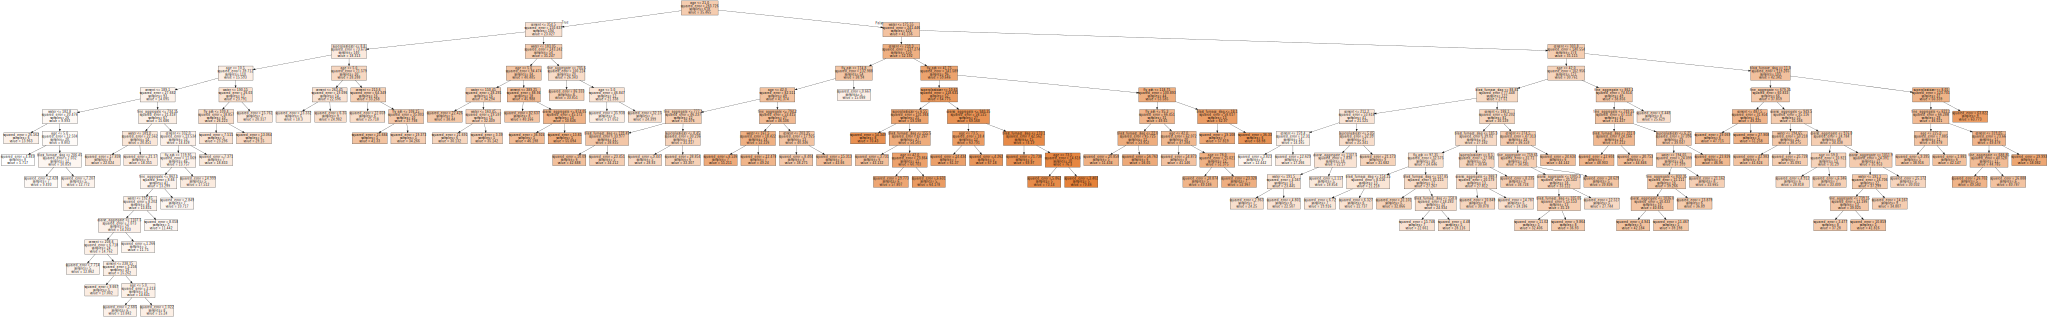

In [11]:
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 5모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

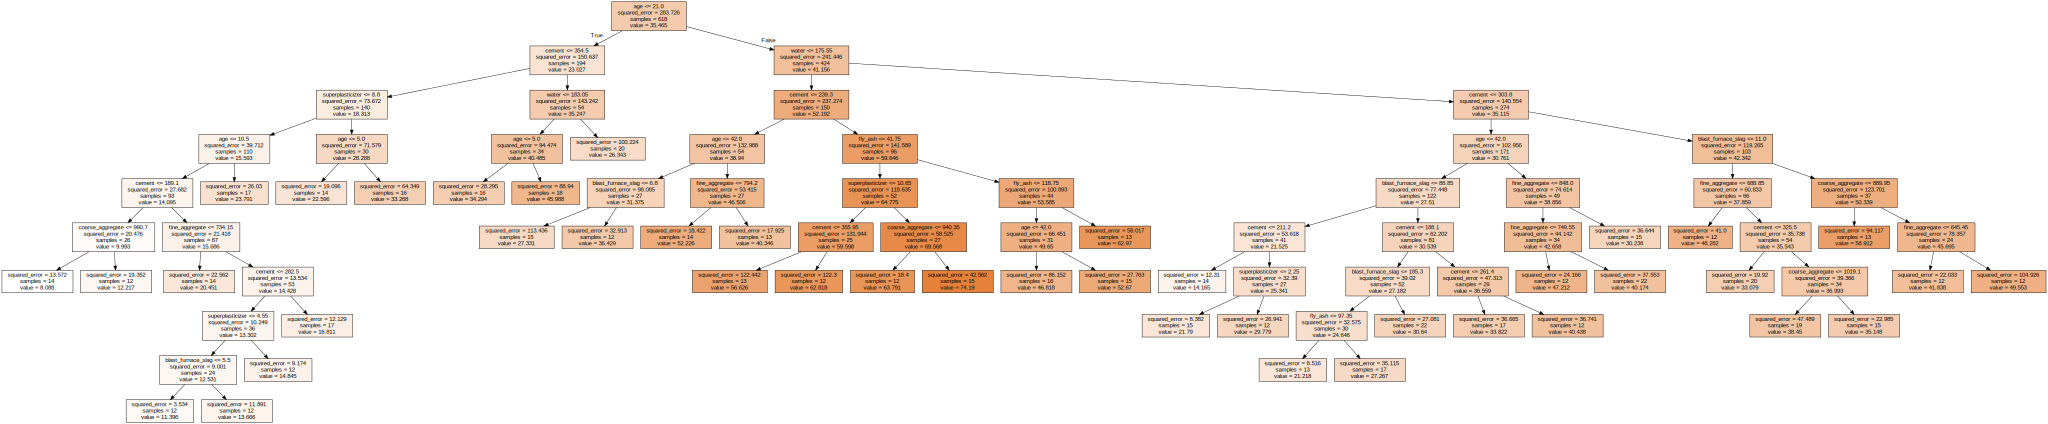

In [12]:
v_feature_name = df_train_x.columns

#노드의 최소 자료 수 = 12모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [13]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = test_score

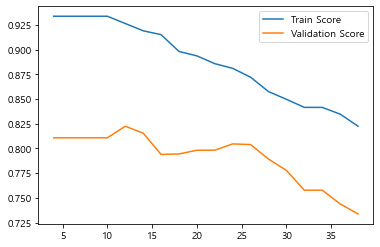

In [14]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "-", label = "Validation Score")
plt.legend()

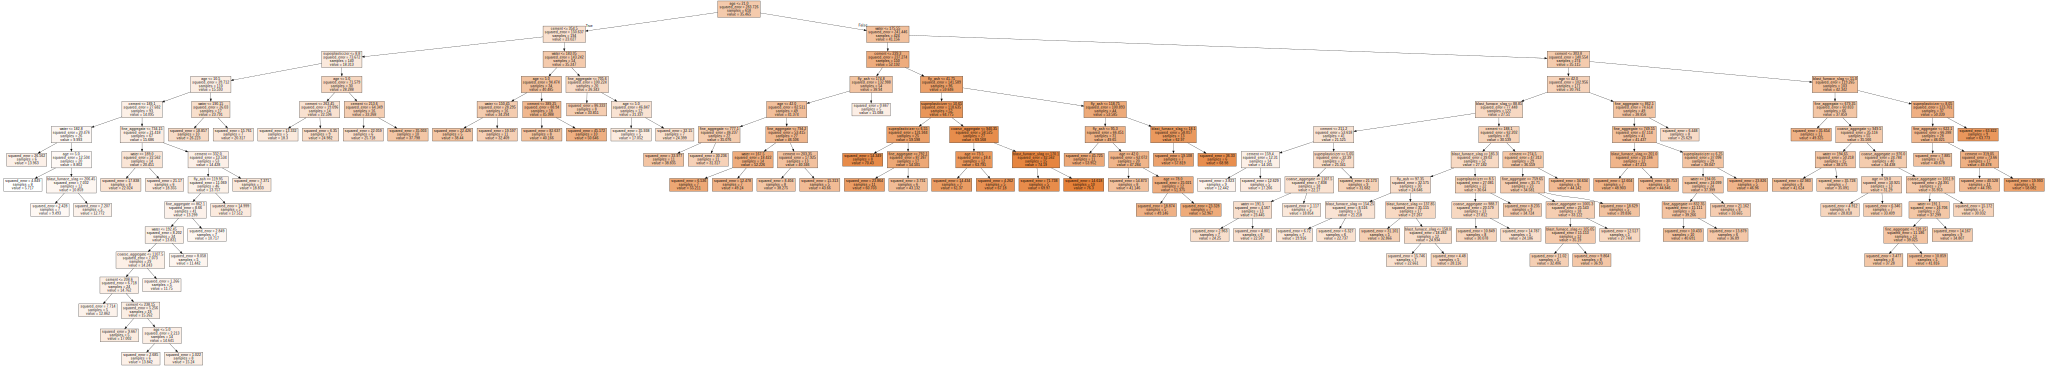

In [15]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

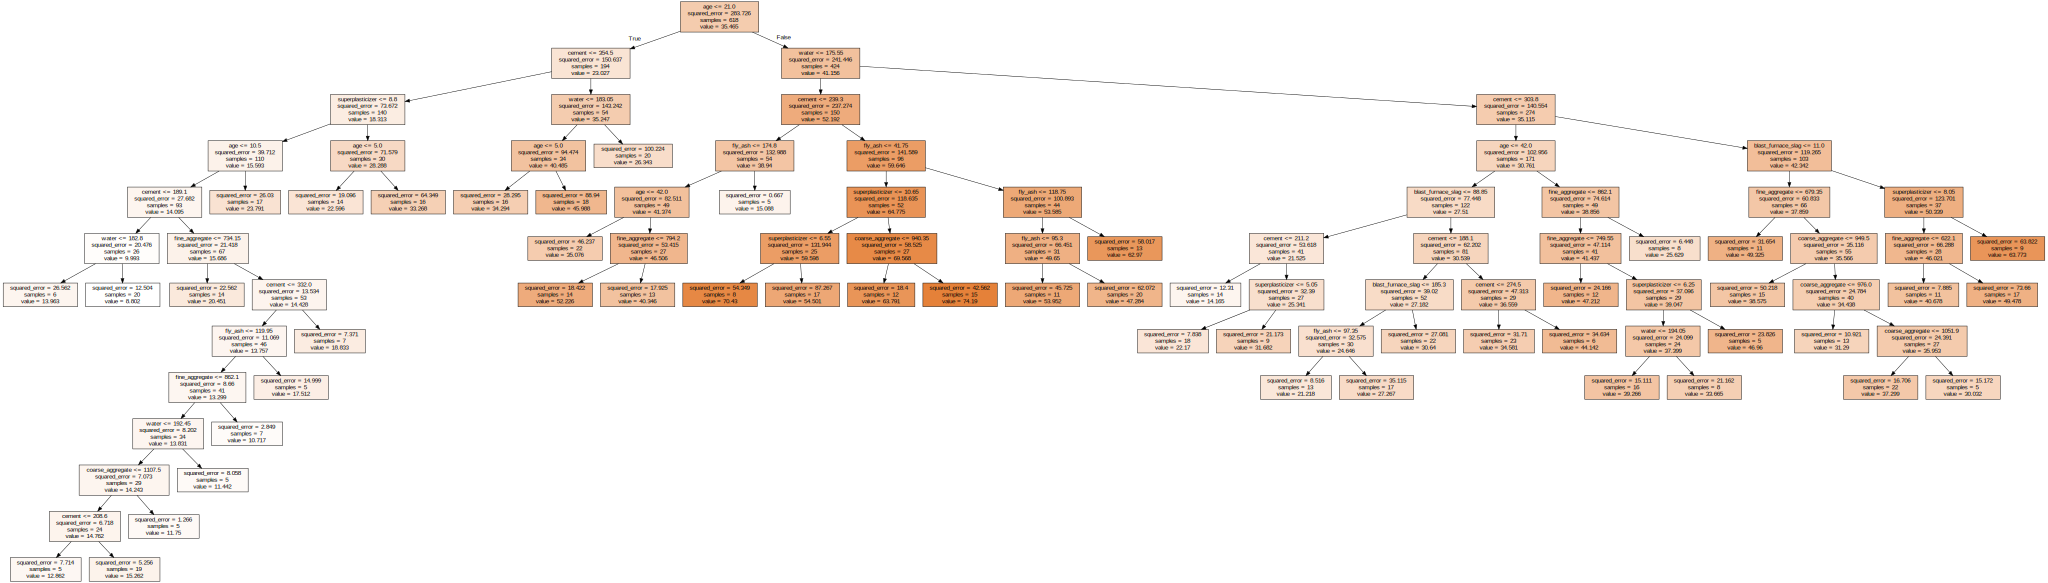

In [16]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=24)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

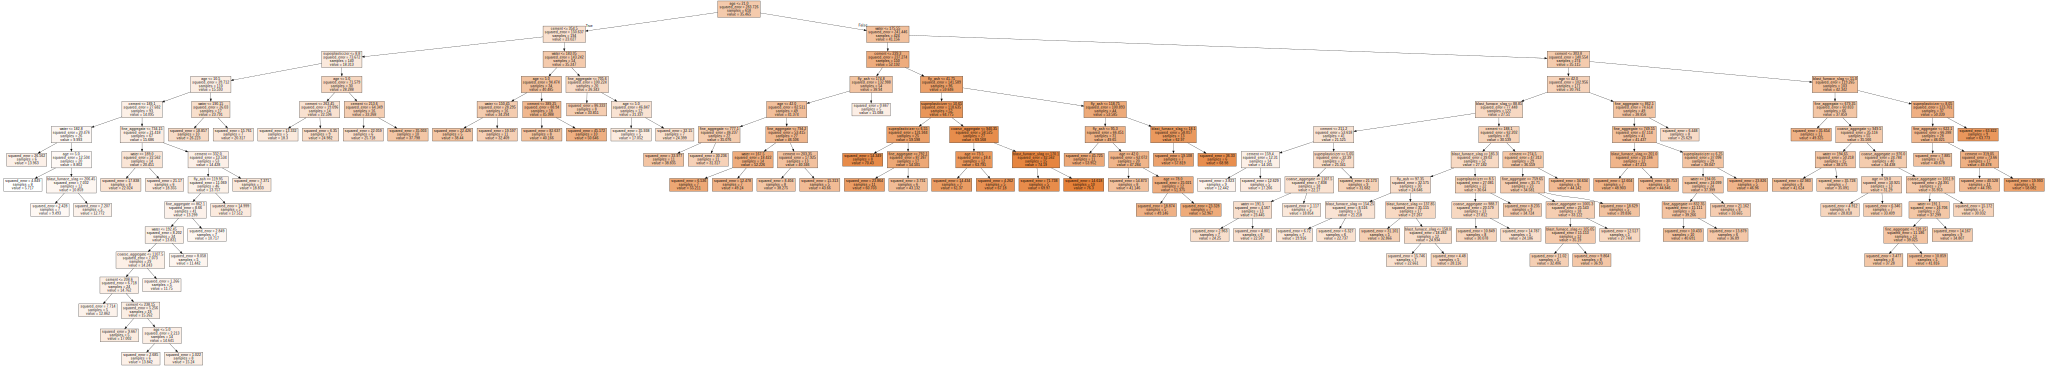

In [17]:
# 12선택
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph)) 

In [18]:
# 모델 파라미터 조정
train_score = []; validation_score = []
para_depth = [n_depth * 1 for n_depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5,min_samples_split = 12, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    validation_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["Depth"] = para_depth
df_score_split["TrainScore"] = train_score
df_score_split["ValidationScore"] = validation_score
df_score_split.round(3)

,Depth,TrainScore,ValidationScore
0,1,0.249,0.243
1,2,0.474,0.406
2,3,0.644,0.567
3,4,0.749,0.671
4,5,0.832,0.734
5,6,0.881,0.794
6,7,0.912,0.815
7,8,0.920,0.815
8,9,0.925,0.812
9,10,0.926,0.812


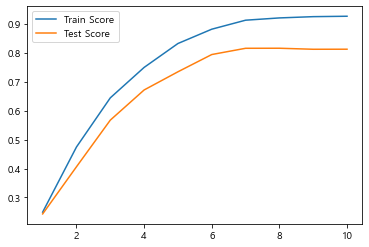

In [19]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle = "-", label = "Test Score")
plt.legend()
#2, 4 선택

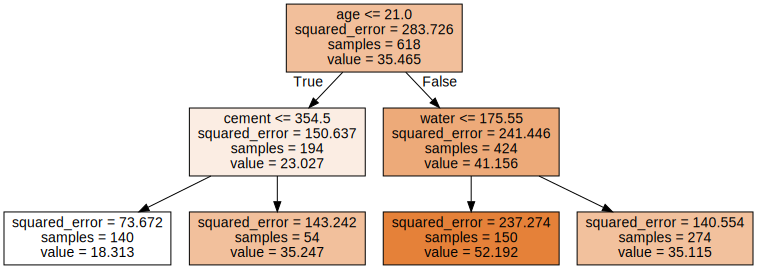

In [20]:
# 최대 깊이=2모델
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf=5, min_samples_split=12, max_depth=2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot",
feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

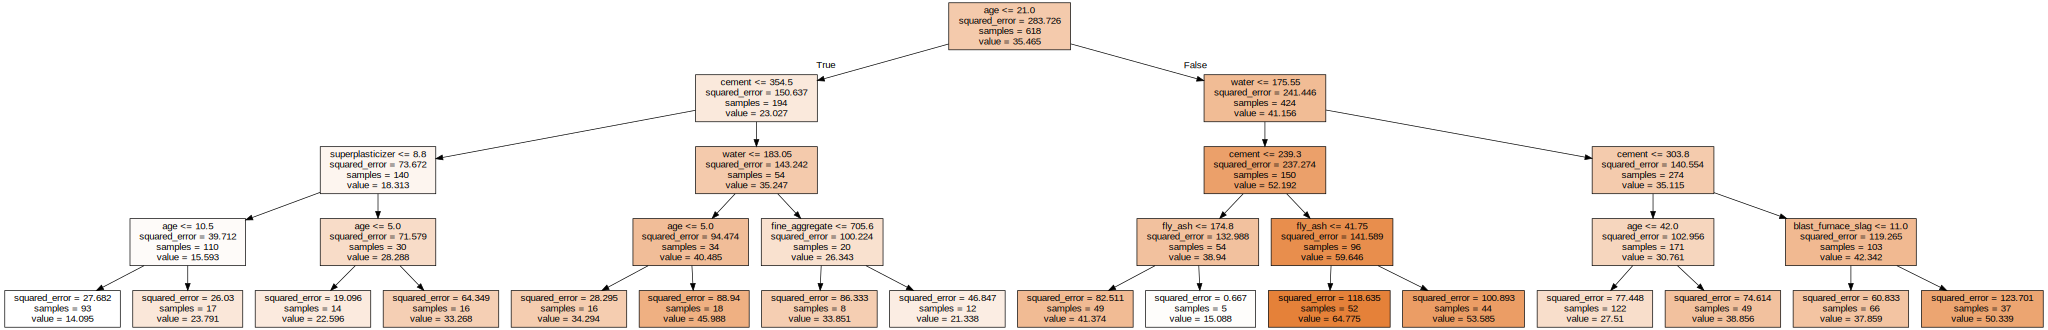

In [21]:
# 최대 깊이=6모델
tree_graph=DecisionTreeRegressor(random_state=1234, min_samples_leaf=5,min_samples_split=12,max_depth=4)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_split.dot", feature_names=v_feature_name,impurity=True,filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [22]:
# 최종모델
tree_final = DecisionTreeRegressor(min_samples_leaf = 5, min_samples_split = 12, max_depth=4,random_state =1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=12,
                      random_state=1234)

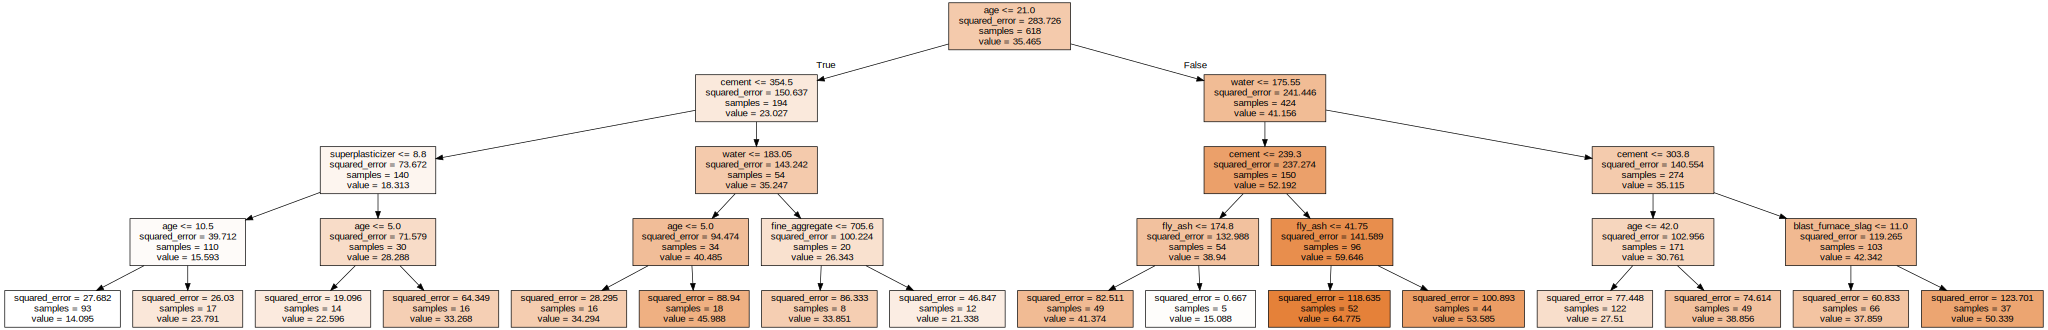

In [23]:
# 최종모델 시각화
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [24]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,age,0.393
0,cement,0.263
3,water,0.234
2,fly_ash,0.047
4,superplasticizer,0.029
1,blast_furnace_slag,0.028
6,fine_aggregate,0.006
5,coarse_aggregate,0.000


Text(0, 0.5, '변수')

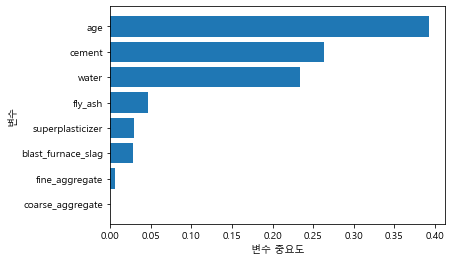

In [25]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [26]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) 
df_pred.describe()

,prediction
count,412.000000
mean,35.801667
std,14.327479
min,14.094731
25%,27.509590
50%,37.859394
75%,41.374286
max,64.775000


In [27]:
# 실제값 
df_test_y.describe() 

count    412.000000
mean      36.347209
std       16.481238
min        4.570000
25%       24.362500
50%       35.230000
75%       46.972500
max       80.200000
Name: strength, dtype: float64

test 결과: 예측값과 실제값이 비슷하다.

## 2번 
#### 콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 
#### predict method를 이용하여 예측값을 구하라. 
#### 데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)
#### -.목표변수(strength)


In [28]:
df_raw = pd.read_csv("D:/data/2/Concrete.csv", encoding = 'EUC-KR')
# 데이터 불러오기
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [29]:
# 목표변수 설정
df_raw_y=df_raw["strength"]
# 설명변수 설정
df_raw_x=df_raw.drop("strength", axis=1, inplace=False) 

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.4, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(618, 8)
(618,)
(412, 8)
(412,)


In [30]:
#기본 옵션으로 모델 생성
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on validation set:{:3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
#과적합 의심

Score on training set:0.980
Score on validation set:0.903987


In [31]:
rf_uncustomized

RandomForestRegressor(random_state=1234)

In [32]:
train_score = []; validation_score =[]
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["ValidationScore"] = validation_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidationScore
0,10,0.973,0.905
1,20,0.978,0.905
2,30,0.979,0.903
3,40,0.979,0.905
4,50,0.980,0.905
5,60,0.980,0.906
6,70,0.980,0.906
7,80,0.980,0.906
8,90,0.980,0.905
9,100,0.980,0.904


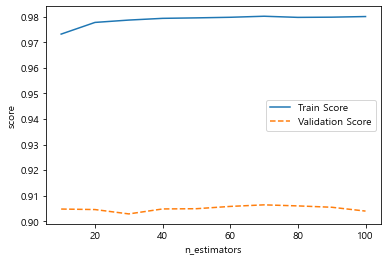

In [33]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, validation_score, linestyle = "--", label = "Validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

# 30개를 초과해도 설명력이 거의 상승하지 않으나, 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100선택

In [34]:
train_score = []; validation_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["ValidationScore"] = validation_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,1,0.980,0.904
1,2,0.967,0.900
2,3,0.953,0.893
3,4,0.939,0.882
4,5,0.926,0.872
5,6,0.915,0.862
6,7,0.904,0.854
7,8,0.896,0.848
8,9,0.888,0.838
9,10,0.878,0.827


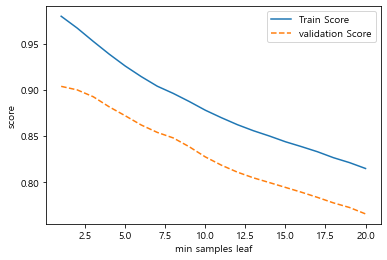

In [35]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# Train과 Validation이 가장 적게 차이나는 14선택

In [36]:
train_score = []; validation_score =[]
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = 14, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["validationScore"] = validation_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,4,0.850,0.800
1,6,0.850,0.800
2,8,0.850,0.800
3,10,0.850,0.800
4,12,0.850,0.800
5,14,0.850,0.800
6,16,0.850,0.800
7,18,0.850,0.800
8,20,0.850,0.800
9,22,0.850,0.800


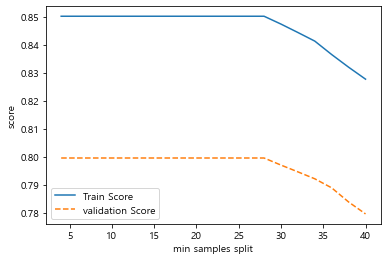

In [37]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [38]:
train_score = []; validation_score =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100,
                              min_samples_leaf = 14, min_samples_split = 28, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["validationScore"] = validation_score
df_score_depth.round(3)

,Depth,TrainScore,validationScore
0,1,0.337,0.329
1,2,0.619,0.595
2,3,0.739,0.695
3,4,0.802,0.752
4,5,0.837,0.787
5,6,0.848,0.797
6,7,0.850,0.799
7,8,0.850,0.800
8,9,0.850,0.800
9,10,0.850,0.800


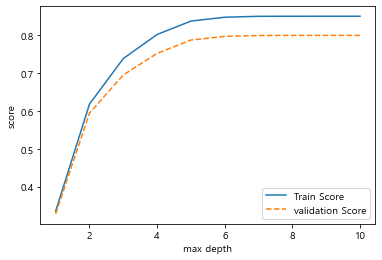

In [39]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [40]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 14,
                                min_samples_split  = 28, max_depth =2)
rf_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on validation set: {:.3}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.619
Score on validation set: 0.595


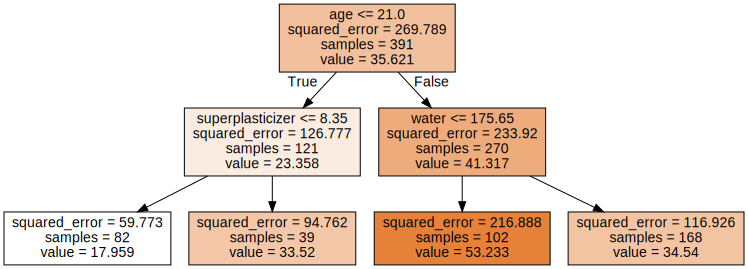

In [41]:
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

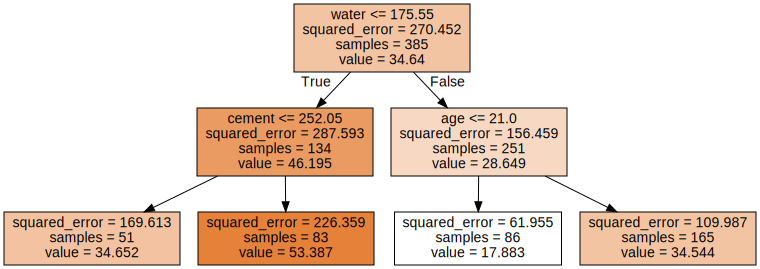

In [42]:
export_graphviz(rf_final.estimators_[1], out_file ="rfr_final_1.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

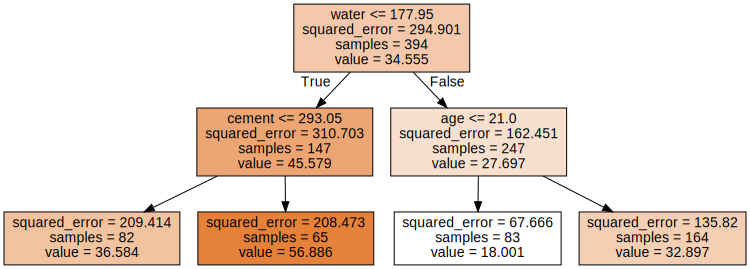

In [43]:
export_graphviz(rf_final.estimators_[10], out_file ="rfr_final_10.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [44]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,age,0.496
0,cement,0.270
3,water,0.156
4,superplasticizer,0.076
2,fly_ash,0.002
1,blast_furnace_slag,0.000
5,coarse_aggregate,0.000
6,fine_aggregate,0.000


Text(0, 0.5, 'Variable')

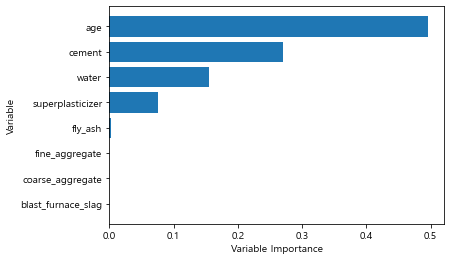

In [45]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [46]:
# 예측값
df_pred = pd.DataFrame({'prediction':rf_final.predict(df_test_x)}) 
df_pred.describe()

,prediction
count,412.000000
mean,35.836243
std,9.522666
min,18.701804
25%,31.041535
50%,36.670422
75%,41.869262
max,55.099043


In [47]:
# 실제값
df_test_y.describe() 

count    412.000000
mean      36.347209
std       16.481238
min        4.570000
25%       24.362500
50%       35.230000
75%       46.972500
max       80.200000
Name: strength, dtype: float64

test 결과: 예측값과 실제값이 비슷하다.

## 3번 
#### 콘크리트 강도를 예측하는 그래디언트 부스팅 모델을 만들고 
#### predict method를 이용하여 예측값을 구하라. 
#### 데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)
#### -.목표변수(strength)


In [48]:
df_raw = pd.read_csv("D:/data/2/Concrete.csv", encoding = 'EUC-KR')

# 데이터 불러오기

df_raw.head() 

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [49]:
# 목표변수 설정
df_raw_y=df_raw["strength"] 
# 설명변수 설정
df_raw_x=df_raw.drop("strength", axis=1, inplace=False) 

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.4, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(618, 8)
(618,)
(412, 8)
(412,)


In [50]:
# 일반 모델 생성

gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on validation set:{:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.951
Score on validation set:0.915


In [51]:
gb_uncustomized

GradientBoostingRegressor(random_state=1234)

In [52]:
# 트리수 변경에 따른 성능모델

train_score = []; validation_score =[]
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["validationScore"] = validation_score
df_score_n.round(3)

,n_estimators,TrainScore,validationScore
0,10,0.646,0.621
1,20,0.807,0.773
2,30,0.870,0.835
3,40,0.898,0.863
4,50,0.915,0.878
5,60,0.925,0.888
6,70,0.934,0.898
7,80,0.940,0.904
8,90,0.946,0.910
9,100,0.951,0.915


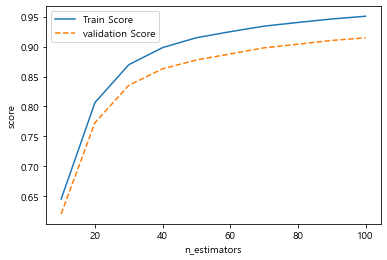

In [53]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [54]:
train_score = []; validation_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    validation_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["validationScore"] = validation_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,1,0.807,0.773
1,2,0.807,0.773
2,3,0.807,0.773
3,4,0.807,0.773
4,5,0.807,0.773
5,6,0.806,0.775
6,7,0.806,0.775
7,8,0.806,0.775
8,9,0.806,0.774
9,10,0.806,0.774


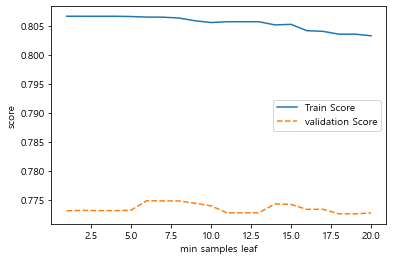

In [55]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [56]:
train_score = []; validation_score = []
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20, min_samples_leaf=15, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["validationScore"] = validation_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,validationScore
0,2,0.805,0.774
1,4,0.805,0.774
2,6,0.805,0.774
3,8,0.805,0.774
4,10,0.805,0.774
5,12,0.805,0.774
6,14,0.805,0.774
7,16,0.805,0.774
8,18,0.805,0.774
9,20,0.805,0.774


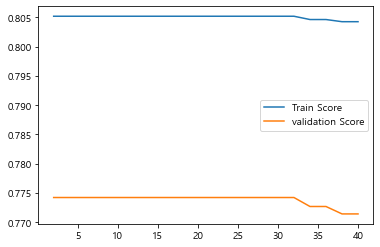

In [57]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, validation_score, linestyle = "-", label = "validation Score")
plt.legend()

In [58]:
train_score = []; validation_score =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = 15, min_samples_split = 34, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["validationScore"] = validation_score
df_score_depth.round(3)

,Depth,TrainScore,validationScore
0,1,0.509,0.481
1,2,0.713,0.681
2,3,0.805,0.773
3,4,0.862,0.824
4,5,0.889,0.850
5,6,0.897,0.856
6,7,0.902,0.858
7,8,0.904,0.860
8,9,0.906,0.862
9,10,0.906,0.863


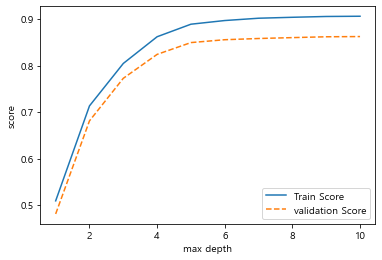

In [59]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [60]:
train_score = []; validation_score =[]
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20,
                              min_samples_leaf = 15, min_samples_split = 34, max_depth=2, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    validation_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["validationScore"] = validation_score
df_score_lr.round(3)

,LearningRate,TrainScore,validationScore
0,0.1,0.713,0.681
1,0.2,0.839,0.812
2,0.3,0.877,0.852
3,0.4,0.885,0.859
4,0.5,0.889,0.858
5,0.6,0.887,0.858
6,0.7,0.892,0.847
7,0.8,0.886,0.848
8,0.9,0.895,0.848


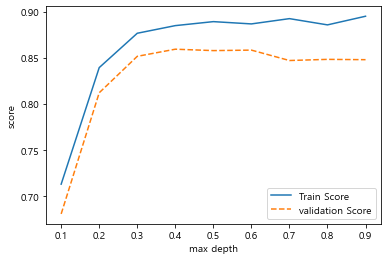

In [61]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, validation_score, linestyle = "--", label = "validation Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [62]:
gb_final = GradientBoostingRegressor(random_state = 1234, n_estimators=20, min_samples_leaf=15, min_samples_split=34, max_depth=2, learning_rate=0.2)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on validation set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.839
Score on validation set:0.812


In [63]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.396
0,cement,0.321
3,water,0.179
1,blast_furnace_slag,0.051
4,superplasticizer,0.029
6,fine_aggregate,0.023
5,coarse_aggregate,0.001
2,fly_ash,0.000


In [1]:
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_importance.sort_values("Importance",ascending=False, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width= df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

NameError: name 'df_importance' is not defined

In [65]:
# 예측값
df_pred = pd.DataFrame({'prediction':gb_final.predict(df_test_x)}) 
df_pred.describe()

,prediction
count,412.000000
mean,36.039755
std,12.945722
min,9.436243
25%,27.119804
50%,35.853369
75%,43.782455
max,68.593928


In [66]:
# 실제값
df_test_y.describe() 

count    412.000000
mean      36.347209
std       16.481238
min        4.570000
25%       24.362500
50%       35.230000
75%       46.972500
max       80.200000
Name: strength, dtype: float64

test 결과: 예측값과 실제값이 비슷하다.